(E(W), E(V)) = (50.00000000000005, 295.2036900004955)


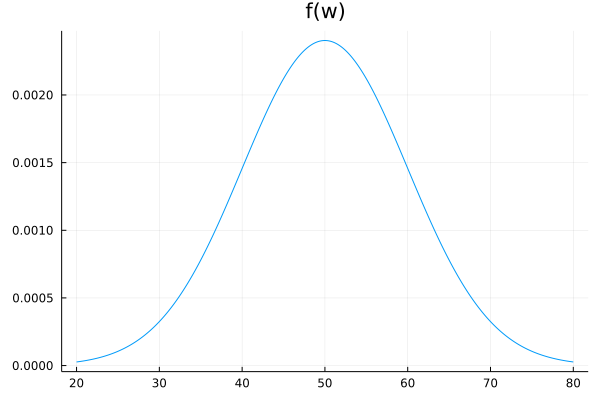

In [172]:
# McCall Labor Search Model
# Problem: accept or reject wage
# Wage offers follow a fixed known distribution, w ~ F

# Structural Parameters
b = 1 # unemployment benefit if wage unaccepted
β = 0.95 # patience
γ = 0.9 # risk aversion
μ = 50 # mean wage offer
σ = 10 # variance wage offer

# Lifetime utility of accepting wage offer: u(w)*(1-β)^-1
# Utility of rejecting today + value of tomorrow's wage offer = b + β*E(V(w'))
# E(V(w')) = ∫f(w'(i))V(w')dw', is known if V is known
# V(w) = max(u(w)*(1-β)^-1, b+β*E(V(w'))
# Apply CMT: Guess V(w), and obtain V_next(w) = T(V)(w) = max(u(w)*(1-b)^-1, c+b*E(V(w')) 
# Repeat till convergence
# Decision Rule: g(w; b, β, γ, μ, σ) ϵ {accept, reject}
# Reservation wage = u^-1(((1-β)*

# Functions
u(c, γ=1/2) = c^(1-γ)/(1-γ) # CARA Utility function
uinv(U, γ=1/2) = ((1-γ)*U)^(1/(1-γ)) # inverse utility

# Wage and Value Placeholder Grids
N = 1000
LB = μ-3*σ
UB = μ+3*σ
W = range(LB, UB, N)
V = u.(W;γ)/(1-β) # initial guess

# Wage Distribution
using Distributions, LinearAlgebra
F = Normal(μ,σ)
P = pdf.(F, W)/sum(pdf.(F, W)) # discrete probabilities
E(W) = dot(P, W) # Expectation operator
@show E(W), E(V)
using StatsPlots
plot(W, P, title = "f(w)", label = false) # distribution of wages

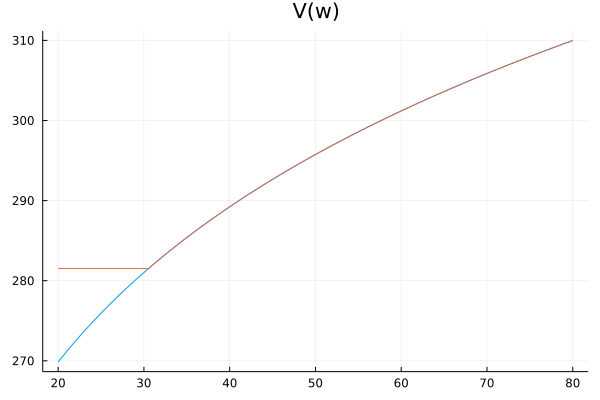

In [173]:
using NLsolve
function reservationWage(b, β, γ, μ, σ; N = 1000)
    W = range(μ-3*σ, μ+3*σ, N) # wage grid
    V = [u(w, γ)/(1-β) for w in W] # value function
    F = Normal(μ,σ) # wage distribution
    P = pdf.(F, W)/sum(pdf.(F, W)) # discrete probabilities
    E(W) = dot(P, W) # Expectation operator
    T(V) = [max(u(w, γ)/(1-β), b+β*E(V)) for w in W] # contraction map
    V = fixedpoint(T, V).zero # value function iteration
    Rw = uinv((1-β)*(b+β*E(V)),γ) # reservation wage
    return V, Rw
end

plot(W, V, title = "Initial Guess", label = false) # distribution of wages
V_, Rw_ = reservationWage(b, β, γ, μ, σ)
plot!(W, V_, title = "V(w)", label = false) # distribution of wages

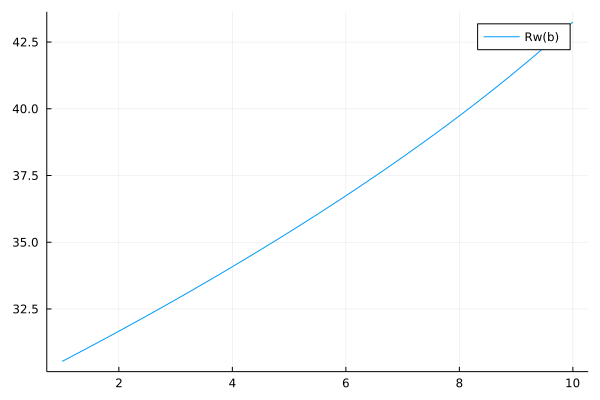

In [175]:
# Effect of Benefits on Reservation Wage
b_vals = range(1.0, 10.0, 25)
p1 = plot(b_vals, [reservationWage(b, β, γ, μ, σ)[2] for b in b_vals], label = "Rw(b)")

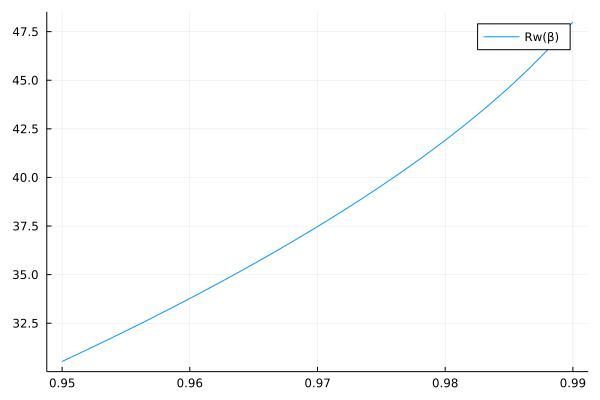

In [176]:
# Effect of Patience on Reservation Wage
β_vals = range(0.95, 0.99, 25)
p2 = plot(β_vals, [reservationWage(b, β, γ, μ, σ)[2] for β in β_vals], label = "Rw(β)")

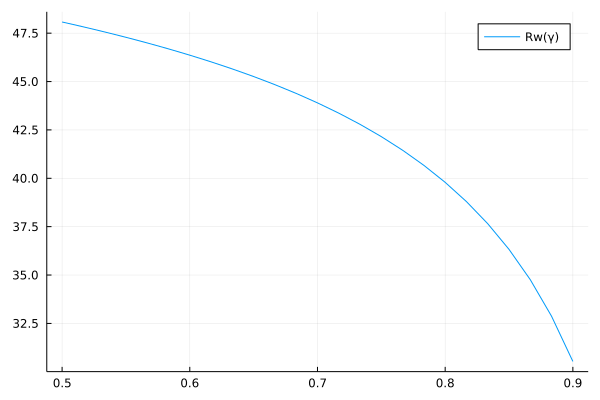

In [177]:
# Effect of Risk Aversion on Reservation Wage
γ_vals = range(0.5, 0.9, 25)
plot(γ_vals, [reservationWage(b, β, γ, μ, σ)[2] for γ in γ_vals], label = "Rw(γ)")

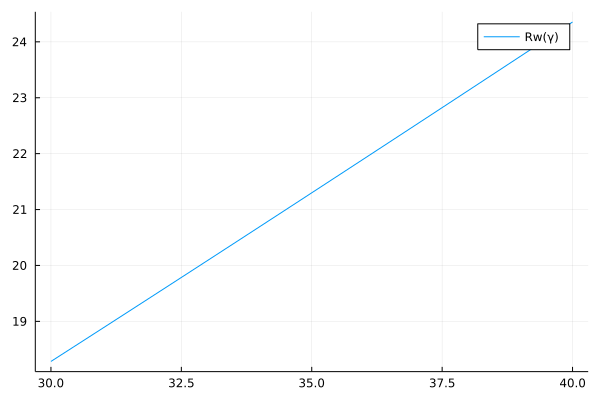

In [178]:
# Effect of Average Wage on Reservation Wage
μ_vals = range(30, 40, 25)
plot(μ_vals, [reservationWage(b, β, γ, μ, σ)[2] for μ in μ_vals], label = "Rw(γ)")